In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from helper_functions import show_images, show_images_by_digit, fit_random_forest_classifier2 
from helper_functions import fit_random_forest_classifier, do_pca, plot_components
import test_code as t

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

`1.` Use pandas to read in the dataset, which can be found at the following address **'./data/train.csv'**.  If you have missing values, fill them with 0.  Take a look at info about the data using `head`, `tail`, `describe`, `info`, etc.  You can learn more about the data values from the article here: https://homepages.inf.ed.ac.uk/rbf/HIPR2/value.htm.

In [2]:
train=pd.read_csv('./data/train.csv')

In [3]:
train.fillna(0,inplace=True)

C:\Users\naman\projects\lessons\Unsupervised\4_PCA\helper_functions.py:44: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  mat_data = X.iloc[digit_num].as_matrix().reshape(28,28)  #reshape images


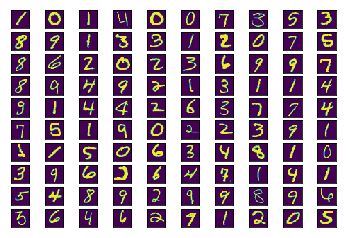

In [4]:
show_images(100)

`2.` Create a vector called **y** that holds the **label** column of the dataset.  Store all other columns holding the pixel data of your images in **X**.

In [5]:
y=train['label']
X=train.drop('label', axis = 1)

In [6]:
#Check Your Solution 
t.question_two_check(y, X)

That looks right!


`3.` Now use the `show_images_by_digit` function from the `helper_functions` module to take a look some of the `1`'s, `2`'s, `3`'s, or any other value you are interested in looking at.  Do they all look like what you would expect?

C:\Users\naman\projects\lessons\Unsupervised\4_PCA\helper_functions.py:63: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  mat_data = X.iloc[indices[0][digit_num]].as_matrix().reshape(28,28)  #reshape images


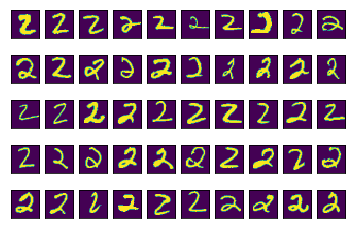

In [7]:
show_images_by_digit(2) # Try looking at a few other digits

[[199   0   1   0   0   0   9   0   0   0]
 [  0 233   3   0   0   0   1   2   4   0]
 [  1   3 214   2   1   0   1   5   0   1]
 [  3   0   5 173   0   5   0   1   2   2]
 [  1   0   0   0 169   0   2   0   0   6]
 [  3   1   0   3   1 173   4   0   1   0]
 [  0   0   2   0   1   2 205   1   0   0]
 [  0   1   7   0   6   0   1 203   2   5]
 [  1   1   1   4   1   4   0   0 188   2]
 [  2   0   1   2  11   2   0   1   3 186]]
AxesSubplot(0.125,0.125;0.62x0.755)
0.9336857280153772


0.9336857280153772

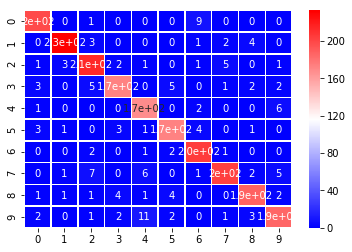

In [8]:
# Remove the tag to fit the RF model from the video, you can also try fitting your own!
fit_random_forest_classifier(X, y)

In [9]:
pca,X_pca=do_pca(2,X)

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


`6.` The **X_pca** has moved the original more than 700 features down to only 2 features that capture the majority of the variability in the pixel values. 

[[109   0  39   7   6  11  28   0   8   1]
 [  0 209   0   4   1   7   3   7   7   5]
 [ 40   2  72  24  15  22  37   0  11   5]
 [ 11   2  31  22  19  31  23   9  27  16]
 [  5   4  16  22  50  14  15  10  11  31]
 [  8   8  31  24  16  29  25   4  33   8]
 [ 32   4  51  17  12  28  34   3  29   1]
 [  3   2   5  11  33   7   3  93   9  59]
 [  6   6  31  25  25  31  20   8  39  11]
 [  2  12   4  15  32   9   4  53  12  65]]
AxesSubplot(0.125,0.125;0.62x0.755)
0.34694858241230175


0.34694858241230175

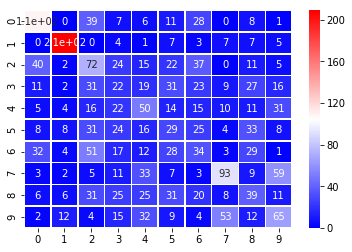

In [10]:
fit_random_forest_classifier(X_pca,y)

`7.` Now you can look at the separation of the values using the `plot_components` function.  If you plot all of the points (more than 40,000), you will likely not be able to see much of what is happening.  I recommend plotting just a subset of the data.  Which value(s) have some separation that are being predicted better than others based on these two components?

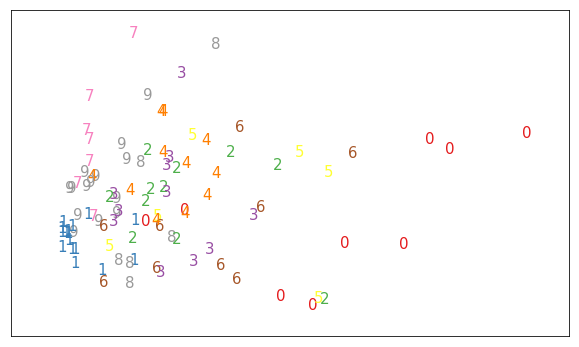

In [11]:
# Try plotting some of the numbers below - you can change the number
# of digits that are plotted, but it is probably best not to plot the 
# entire dataset.  Your visual will not be readable.

plot_components(X_pca[:100], y[:100])

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[[193   0   2   0   1   1   7   2   2   1]
 [  0 234   2   0   0   1   2   0   4   0]
 [  2   2 208   5   2   0   3   4   2   0]
 [  0   0   7 168   0   6   0   2   5   3]
 [  0   0   3   0 154   1   5   1   0  14]
 [  2   0   3   8   1 166   0   0   3   3]
 [  6   0   1   0   3   0 200   0   1   0]
 [  0   1   5   1   5   0   0 199   3  11]
 [  2   2   1  14   1   7   0   0 173   2]
 [  2   0   2   3  12   0   0  13   2 174]]
AxesSubplot(0.125,0.125;0.62x0.755)
0.8981259010091303


C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[[191   0   3   1   1   2   7   2   1   1]
 [  0 234   2   0   0   1   2   0   4   0]
 [  1   2 209   5   3   0   2   3   2   1]
 [  0   0   7 167   0   6   0   2   6   3]
 [  0   0   3   0 160   0   4   1   0  10]
 [  2   0   2   8   2 166   1   0   3   2]
 [  4   0   3   0   3   1 200   0   0   0]
 [  1   1   4   4   4   0   0 197   3  11]
 [  3   2   1  12   1   6   0   0 174   3]
 [  1   0   2   3  11   1   0  14   2 174]]
AxesSubplot(0.125,0.125;0.496x0.755)
0.8995675156174916


C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[[195   0   3   1   0   0   7   1   1   1]
 [  0 231   2   1   0   0   2   0   6   1]
 [  1   2 209   4   2   0   3   3   3   1]
 [  0   0   9 166   0   6   0   2   6   2]
 [  0   0   4   0 159   0   3   1   0  11]
 [  1   0   2  11   1 159   4   0   4   4]
 [  4   0   1   0   3   1 201   0   1   0]
 [  0   1   5   2   3   0   1 196   2  15]
 [  1   1   0  13   1   7   0   0 176   3]
 [  2   0   1   2  12   1   0  12   1 177]]
AxesSubplot(0.125,0.125;0.3968x0.755)
0.8981259010091303


C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[[192   0   2   1   0   2   9   1   1   1]
 [  0 233   2   0   0   1   2   0   5   0]
 [  1   2 208   4   2   0   3   4   4   0]
 [  0   0   8 169   0   4   0   2   6   2]
 [  0   0   4   0 154   1   3   1   0  15]
 [  1   0   1   7   0 169   0   1   4   3]
 [  5   0   1   0   3   1 200   0   1   0]
 [  0   1   7   1   3   0   0 198   2  13]
 [  1   1   1  13   0   7   1   0 176   2]
 [  2   0   2   2  11   0   0  16   1 174]]
AxesSubplot(0.125,0.125;0.31744x0.755)
0.9000480538202787
With only 23 components, a random forest acheived an accuracy of 0.9000480538202787.


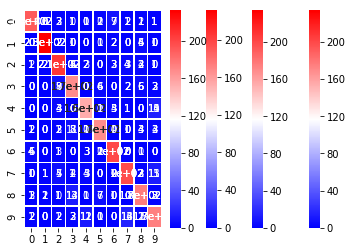

In [12]:
for comp in range(20, 100):
    pca, X_pca = do_pca(comp, X)
    acc = fit_random_forest_classifier(X_pca, y)
    if acc > .90:
        print("With only {} components, a random forest acheived an accuracy of {}.".format(comp, acc))
        break

`4.` It is possible that extra features in the dataset even lead to overfitting or the [curse of dimensionality](https://stats.stackexchange.com/questions/65379/machine-learning-curse-of-dimensionality-explained). 

In [13]:

accs = []
comps = []
for comp in range(2, 100):
    comps.append(comp)
    pca, X_pca = do_pca(comp, X)
    acc = fit_random_forest_classifier2(X_pca, y)
    accs.append(acc)

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dty

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dty

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dty

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dty

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dty

C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\naman\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dty

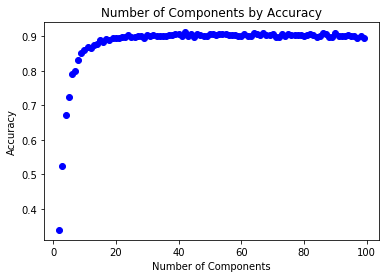

In [14]:
plt.plot(comps, accs, 'bo');
plt.xlabel('Number of Components');
plt.ylabel('Accuracy');
plt.title('Number of Components by Accuracy');

In [15]:
# The max accuracy and corresponding number of components
np.max(accs), comps[np.where(accs == np.max(accs))[0][0]]

(0.9111004324843825, 42)